<a href="https://colab.research.google.com/github/hee-chang/Bachelor_Thesis/blob/main/%EC%A1%B8%EC%97%85_%EB%85%BC%EB%AC%B8_CNN_Algorithm_%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving new_datasets.zip to new_datasets.zip


In [ ]:
!unzip new_datasets.zip

Archive:  new_datasets.zip
  inflating: test_data/ans_0/270_60_0.png  
  inflating: test_data/ans_0/270_65_0.png  
  inflating: test_data/ans_0/270_70_0.png  
  inflating: test_data/ans_0/270_75_0.png  
  inflating: test_data/ans_0/270_80_0.png  
  inflating: test_data/ans_0/271_60_0.png  
  inflating: test_data/ans_0/271_65_0.png  
  inflating: test_data/ans_0/271_70_0.png  
  inflating: test_data/ans_0/271_75_0.png  
  inflating: test_data/ans_0/271_80_0.png  
  inflating: test_data/ans_0/272_60_0.png  
  inflating: test_data/ans_0/272_65_0.png  
  inflating: test_data/ans_0/272_70_0.png  
  inflating: test_data/ans_0/272_75_0.png  
  inflating: test_data/ans_0/273_60_0.png  
  inflating: test_data/ans_0/273_65_0.png  
  inflating: test_data/ans_0/273_70_0.png  
  inflating: test_data/ans_0/274_60_0.png  
  inflating: test_data/ans_0/274_65_0.png  
  inflating: test_data/ans_1/272_80_1.png  
  inflating: test_data/ans_1/273_75_1.png  
  inflating: test_data/ans_1/273_80_1.png  
  inf

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
EPOCHS = 50

In [ ]:
class ConvNet(tf.keras.Model):
    def __init__(self):
        super(ConvNet, self).__init__()
        conv2d = tf.keras.layers.Conv2D
        maxpool = tf.keras.layers.MaxPool2D
        
        self.sequence = list()  
        self.sequence.append(conv2d(16, (3, 3), padding='same', activation='relu'))
        self.sequence.append(maxpool((2, 2)))  
        
        self.sequence.append(conv2d(32, (3, 3), padding='same', activation='relu'))
        self.sequence.append(maxpool((2, 2)))  
        
        self.sequence.append(conv2d(64, (3, 3), padding='same', activation='relu'))
        self.sequence.append(maxpool((2, 2)))  
        
        self.sequence.append(conv2d(128, (3, 3), padding='same', activation='relu'))
        self.sequence.append(maxpool((2, 2))) 
        
        self.sequence.append(conv2d(256, (3, 3), padding='same', activation='relu'))
        self.sequence.append(maxpool((2, 2)))

        self.sequence.append(conv2d(512, (3, 3), padding='same', activation='relu'))
        self.sequence.append(maxpool((2, 2)))

        self.sequence.append(conv2d(1024, (3, 3), padding='same', activation='relu'))
        self.sequence.append(maxpool((2, 2))) 
        
        self.sequence.append(tf.keras.layers.Flatten())   
        self.sequence.append(tf.keras.layers.Dense(1024, activation='relu'))
        self.sequence.append(tf.keras.layers.Dense(1, activation='sigmoid'))
        
    def call(self, x, training = False, mask = None):
        for layer in self.sequence:
            x = layer(x)
        return x

In [ ]:
# Implement training loop
@tf.function
def train_step(model, images, labels, loss_object, optimizer, train_loss, train_accuracy):
    with tf.GradientTape() as tape:
        predictions = model(images)
        loss = loss_object(labels, predictions)
        
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    train_loss(loss)
    train_accuracy(labels, predictions)
    
# Implement algrithm test
@tf.function
def test_step(model, images, labels, loss_object, test_loss, test_accuracy):
    
    predictions = model(images)
    t_loss = loss_object(labels, predictions)
    
    test_loss(t_loss)
    test_accuracy(labels, predictions)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip = True)

train_ds = train_datagen.flow_from_directory('training',
                                             target_size = (512, 1512),
                                                 batch_size = 150,
                                                 class_mode = 'binary',
                                             shuffle = True)

test_ds = train_datagen.flow_from_directory('test_data',
                                             target_size = (512, 1512),
                                                 batch_size = 30,
                                                 class_mode = 'binary')



x_train, y_train = next(train_ds)
x_test, y_test = next(test_ds)
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
y_train = y_train.astype(np.uint8)
y_test = y_test.astype(np.uint8)

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(1000).batch(16)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(16)


Found 150 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
# Create model
model = ConvNet()

# Define loss and optimizer
loss_object = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()

# Define performance metrics
train_loss = tf.keras.metrics.Mean(name = 'train_loss')
train_accuracy = tf.keras.metrics.BinaryAccuracy(name = 'train_accuracy')

test_loss = tf.keras.metrics.Mean(name = 'test_loss')
test_accuracy = tf.keras.metrics.BinaryAccuracy(name = 'test_accuracy')

In [ ]:
train_loss_history = []
train_acc_history = []
test_loss_history = []
test_acc_history = []

for epoch in range(EPOCHS):
    for images, labels in train_ds:
        train_step(model, images, labels, loss_object, optimizer, train_loss, train_accuracy)

    for test_images, test_labels in test_ds:
        test_step(model, test_images, test_labels, loss_object, test_loss, test_accuracy)
        
    
    template = 'Epoch {}\n Loss: {:.4f}, Accuracy: {:.2f}%\n Test Loss: {:.4f}, Test Accuracy: {:.2f}%\n'
    print(template.format(epoch + 1,
                          train_loss.result(),
                          train_accuracy.result()*100,
                          test_loss.result(),
                          test_accuracy.result() * 100))
    
    train_loss_history.append(train_loss.result())
    train_acc_history.append(train_accuracy.result()*100)
    test_loss_history.append(test_loss.result())
    test_acc_history.append(test_accuracy.result()*100)
    
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()
    

Epoch 1
 Loss: 0.6973, Accuracy: 54.17%
 Test Loss: 0.7377, Test Accuracy: 37.05%

Epoch 2
 Loss: 0.6924, Accuracy: 56.04%
 Test Loss: 0.7142, Test Accuracy: 37.05%

Epoch 3
 Loss: 0.7013, Accuracy: 56.04%
 Test Loss: 0.6856, Test Accuracy: 37.05%

Epoch 4
 Loss: 0.6322, Accuracy: 58.33%
 Test Loss: 0.6692, Test Accuracy: 63.39%

Epoch 5
 Loss: 0.6260, Accuracy: 70.83%
 Test Loss: 0.6103, Test Accuracy: 63.39%

Epoch 6
 Loss: 0.6042, Accuracy: 68.12%
 Test Loss: 0.6148, Test Accuracy: 63.39%

Epoch 7
 Loss: 0.5938, Accuracy: 78.33%
 Test Loss: 0.5686, Test Accuracy: 73.66%

Epoch 8
 Loss: 0.5795, Accuracy: 73.75%
 Test Loss: 0.4901, Test Accuracy: 79.91%

Epoch 9
 Loss: 0.4897, Accuracy: 80.42%
 Test Loss: 0.4320, Test Accuracy: 79.91%

Epoch 10
 Loss: 0.3774, Accuracy: 82.71%
 Test Loss: 0.2808, Test Accuracy: 89.73%

Epoch 11
 Loss: 0.2808, Accuracy: 87.08%
 Test Loss: 0.6610, Test Accuracy: 75.89%

Epoch 12
 Loss: 0.4175, Accuracy: 87.08%
 Test Loss: 0.3693, Test Accuracy: 86.16%

E

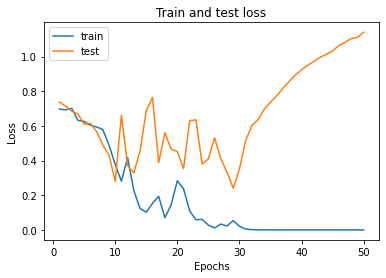

In [ ]:
epochs = range(1, EPOCHS + 1)

plt.plot(epochs, train_loss_history)
plt.plot(epochs, test_loss_history)
plt.title('Train and test loss')
plt.legend(['train', 'test'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

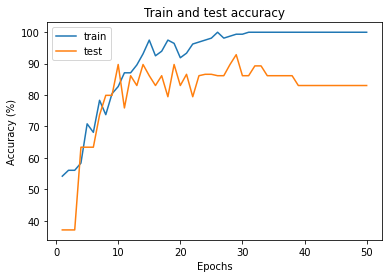

In [ ]:
plt.plot(epochs, train_acc_history)
plt.plot(epochs, test_acc_history)
plt.title('Train and test accuracy')
plt.legend(['train', 'test'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.show()